In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os
import numpy as np
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

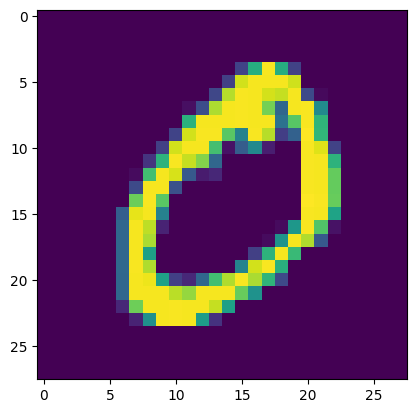

In [4]:
plt.imshow(x_train[1])

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train = x_train.reshape(-1, 28*28).astype("float32") /255
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255

# removing normalisation - less accuracy, more time to train
# x_train = x_train.reshape(-1, 28*28).astype("float32")
# x_test = x_test.reshape(-1, 28*28).astype("float32")

In [7]:
type(x_train)

numpy.ndarray

In [8]:
# x_train = tf.convert_to_tensor(x_trian)
# no need to do as this will be done internally

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=(28*28)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [10]:

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

Epoch 1/10


c:\Users\praya\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


938/938 - 4s - loss: 0.2040 - accuracy: 0.9374 - 4s/epoch - 4ms/step
Epoch 2/10
938/938 - 3s - loss: 0.0814 - accuracy: 0.9747 - 3s/epoch - 3ms/step
Epoch 3/10
938/938 - 3s - loss: 0.0582 - accuracy: 0.9815 - 3s/epoch - 3ms/step
Epoch 4/10
938/938 - 3s - loss: 0.0443 - accuracy: 0.9855 - 3s/epoch - 3ms/step
Epoch 5/10
938/938 - 3s - loss: 0.0335 - accuracy: 0.9889 - 3s/epoch - 3ms/step
Epoch 6/10
938/938 - 3s - loss: 0.0278 - accuracy: 0.9913 - 3s/epoch - 3ms/step
Epoch 7/10
938/938 - 3s - loss: 0.0246 - accuracy: 0.9916 - 3s/epoch - 3ms/step
Epoch 8/10
938/938 - 3s - loss: 0.0235 - accuracy: 0.9923 - 3s/epoch - 3ms/step
Epoch 9/10
938/938 - 3s - loss: 0.0183 - accuracy: 0.9942 - 3s/epoch - 3ms/step
Epoch 10/10
938/938 - 3s - loss: 0.0182 - accuracy: 0.9944 - 3s/epoch - 3ms/step
157/157 - 0s - loss: 0.0909 - accuracy: 0.9784 - 479ms/epoch - 3ms/step


[0.09087911248207092, 0.9783999919891357]

The number 1875 shown during fitting the model is not the training samples; it is the number of batches.

In [11]:
# Another way to write a model

In [12]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(28*28)))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

model2.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)
model2.evaluate(x_test, y_test, batch_size=64, verbose=2)

Epoch 1/10
938/938 - 3s - loss: 0.1993 - accuracy: 0.9404 - 3s/epoch - 3ms/step
Epoch 2/10
938/938 - 3s - loss: 0.0785 - accuracy: 0.9758 - 3s/epoch - 3ms/step
Epoch 3/10
938/938 - 3s - loss: 0.0509 - accuracy: 0.9837 - 3s/epoch - 3ms/step
Epoch 4/10
938/938 - 3s - loss: 0.0366 - accuracy: 0.9882 - 3s/epoch - 3ms/step
Epoch 5/10
938/938 - 3s - loss: 0.0283 - accuracy: 0.9910 - 3s/epoch - 3ms/step
Epoch 6/10
938/938 - 3s - loss: 0.0257 - accuracy: 0.9913 - 3s/epoch - 3ms/step
Epoch 7/10
938/938 - 3s - loss: 0.0197 - accuracy: 0.9936 - 3s/epoch - 3ms/step
Epoch 8/10
938/938 - 3s - loss: 0.0180 - accuracy: 0.9941 - 3s/epoch - 3ms/step
Epoch 9/10
938/938 - 3s - loss: 0.0150 - accuracy: 0.9947 - 3s/epoch - 3ms/step
Epoch 10/10
938/938 - 3s - loss: 0.0146 - accuracy: 0.9952 - 3s/epoch - 3ms/step
157/157 - 0s - loss: 0.0832 - accuracy: 0.9822 - 452ms/epoch - 3ms/step


[0.0831514373421669, 0.982200026512146]

In [13]:
# Functional api

In [19]:
inputs = keras.Input(shape=(784))
x=layers.Dense(512, activation='relu')(inputs)
x=layers.Dense(256, activation='relu')(x)
# x=layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model3 = keras.Model(inputs=inputs, outputs=outputs)

model3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

In [21]:
model3.fit(x_train, y_train, batch_size=32, epochs=10, verbose=2)
model3.evaluate(x_test, y_test, batch_size=32, verbose=2)

Epoch 1/10
1875/1875 - 5s - loss: 0.0306 - accuracy: 0.9899 - 5s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.0209 - accuracy: 0.9934 - 5s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.0201 - accuracy: 0.9938 - 5s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.0187 - accuracy: 0.9945 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 5s - loss: 0.0153 - accuracy: 0.9954 - 5s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 6s - loss: 0.0151 - accuracy: 0.9952 - 6s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 6s - loss: 0.0138 - accuracy: 0.9955 - 6s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 6s - loss: 0.0133 - accuracy: 0.9961 - 6s/epoch - 3ms/step
Epoch 9/10
1875/1875 - 5s - loss: 0.0120 - accuracy: 0.9965 - 5s/epoch - 3ms/step
Epoch 10/10
1875/1875 - 5s - loss: 0.0137 - accuracy: 0.9962 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 0.1285 - accuracy: 0.9791 - 707ms/epoch - 2ms/step


[0.12850023806095123, 0.9790999889373779]